In [ ]:
##Multiple linear regression 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [134]:
df = pd.read_csv(r"D:\Admin\Downloads\mlr.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [135]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [136]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

<Axes: >

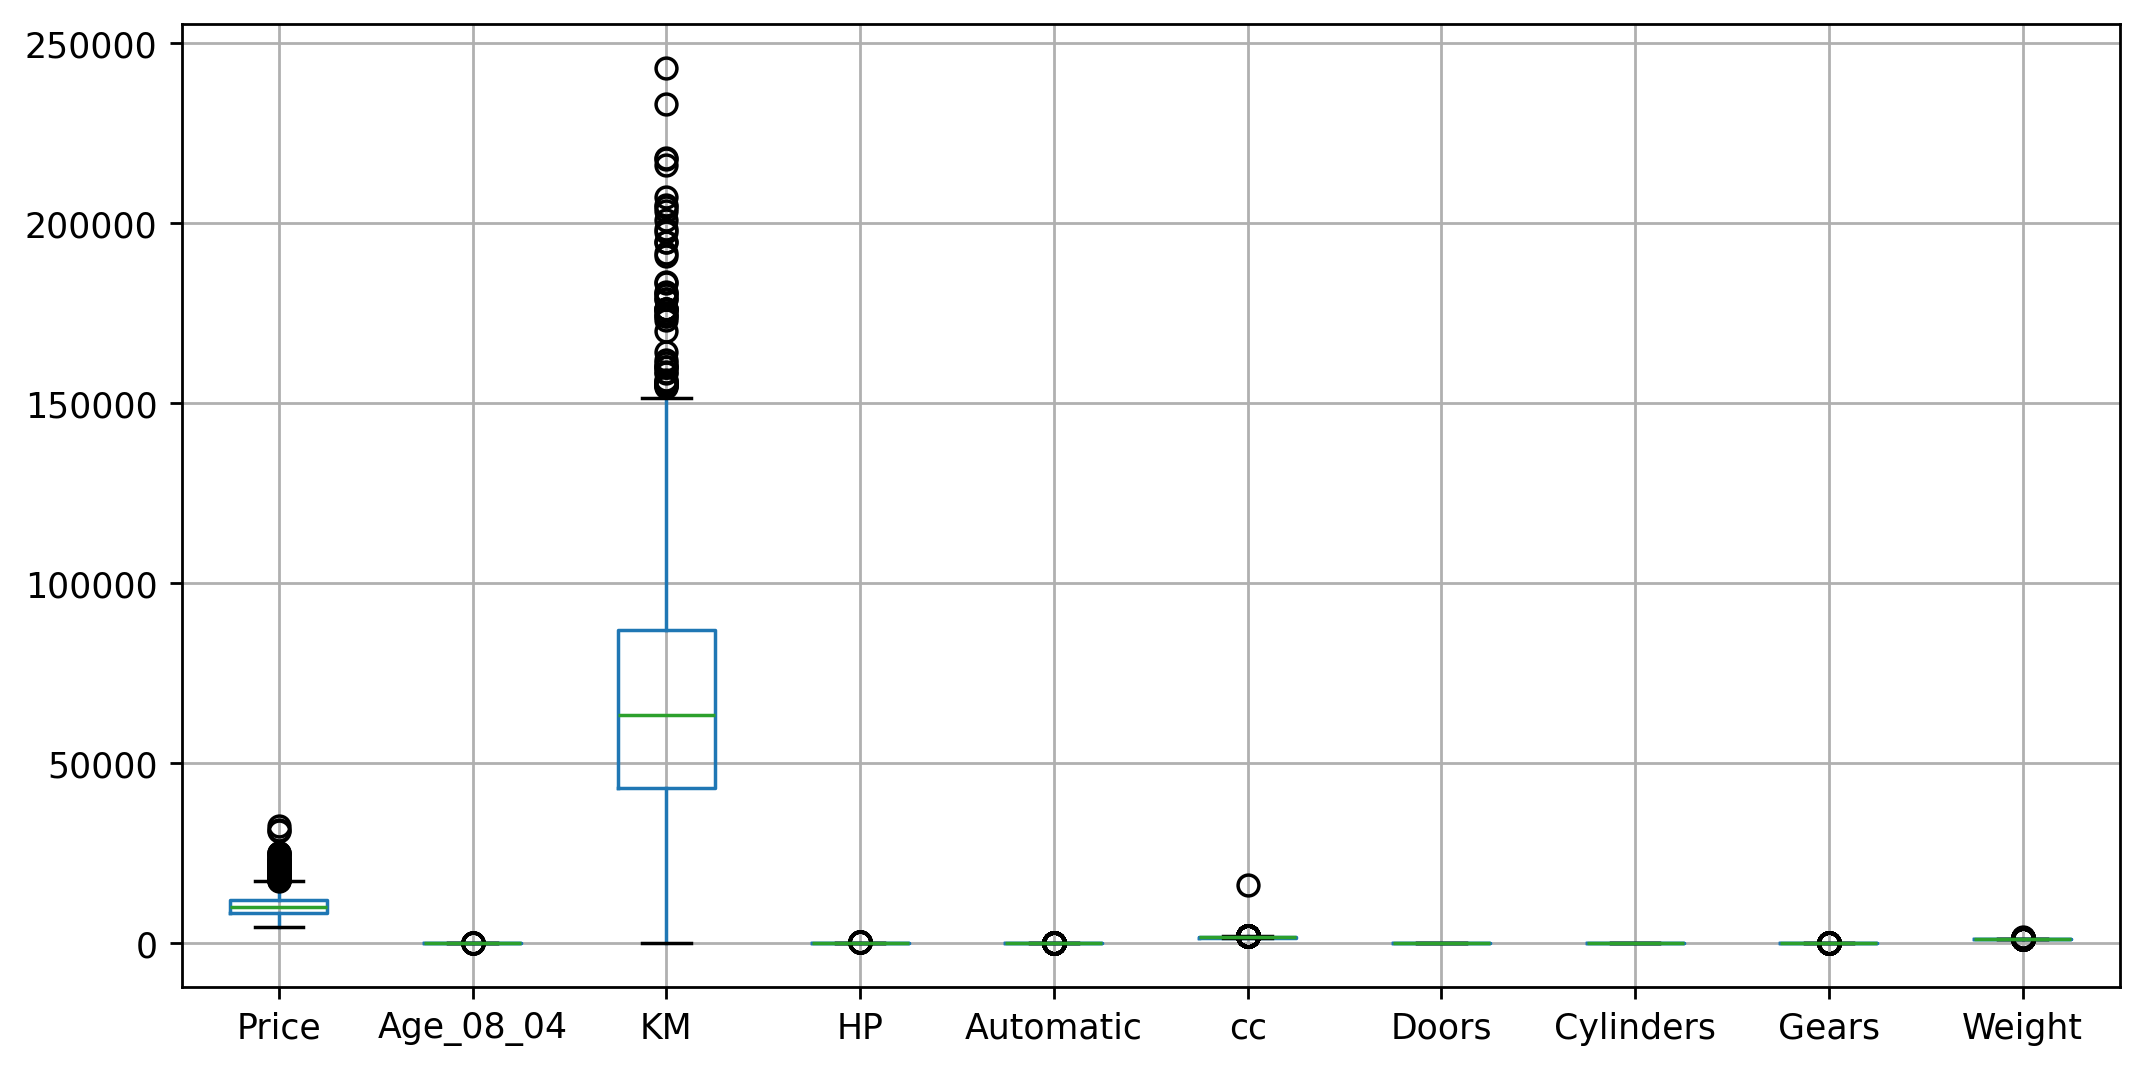

In [137]:
df.boxplot()

In [138]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [139]:
def outlier(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    return lower, upper

In [140]:
def outlier_detection(data, columns): 
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [141]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [142]:
df.drop(columns=['Fuel_Type']).columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [143]:
outlier_detection(df, df.drop(columns=['Fuel_Type']).columns)

<Axes: >

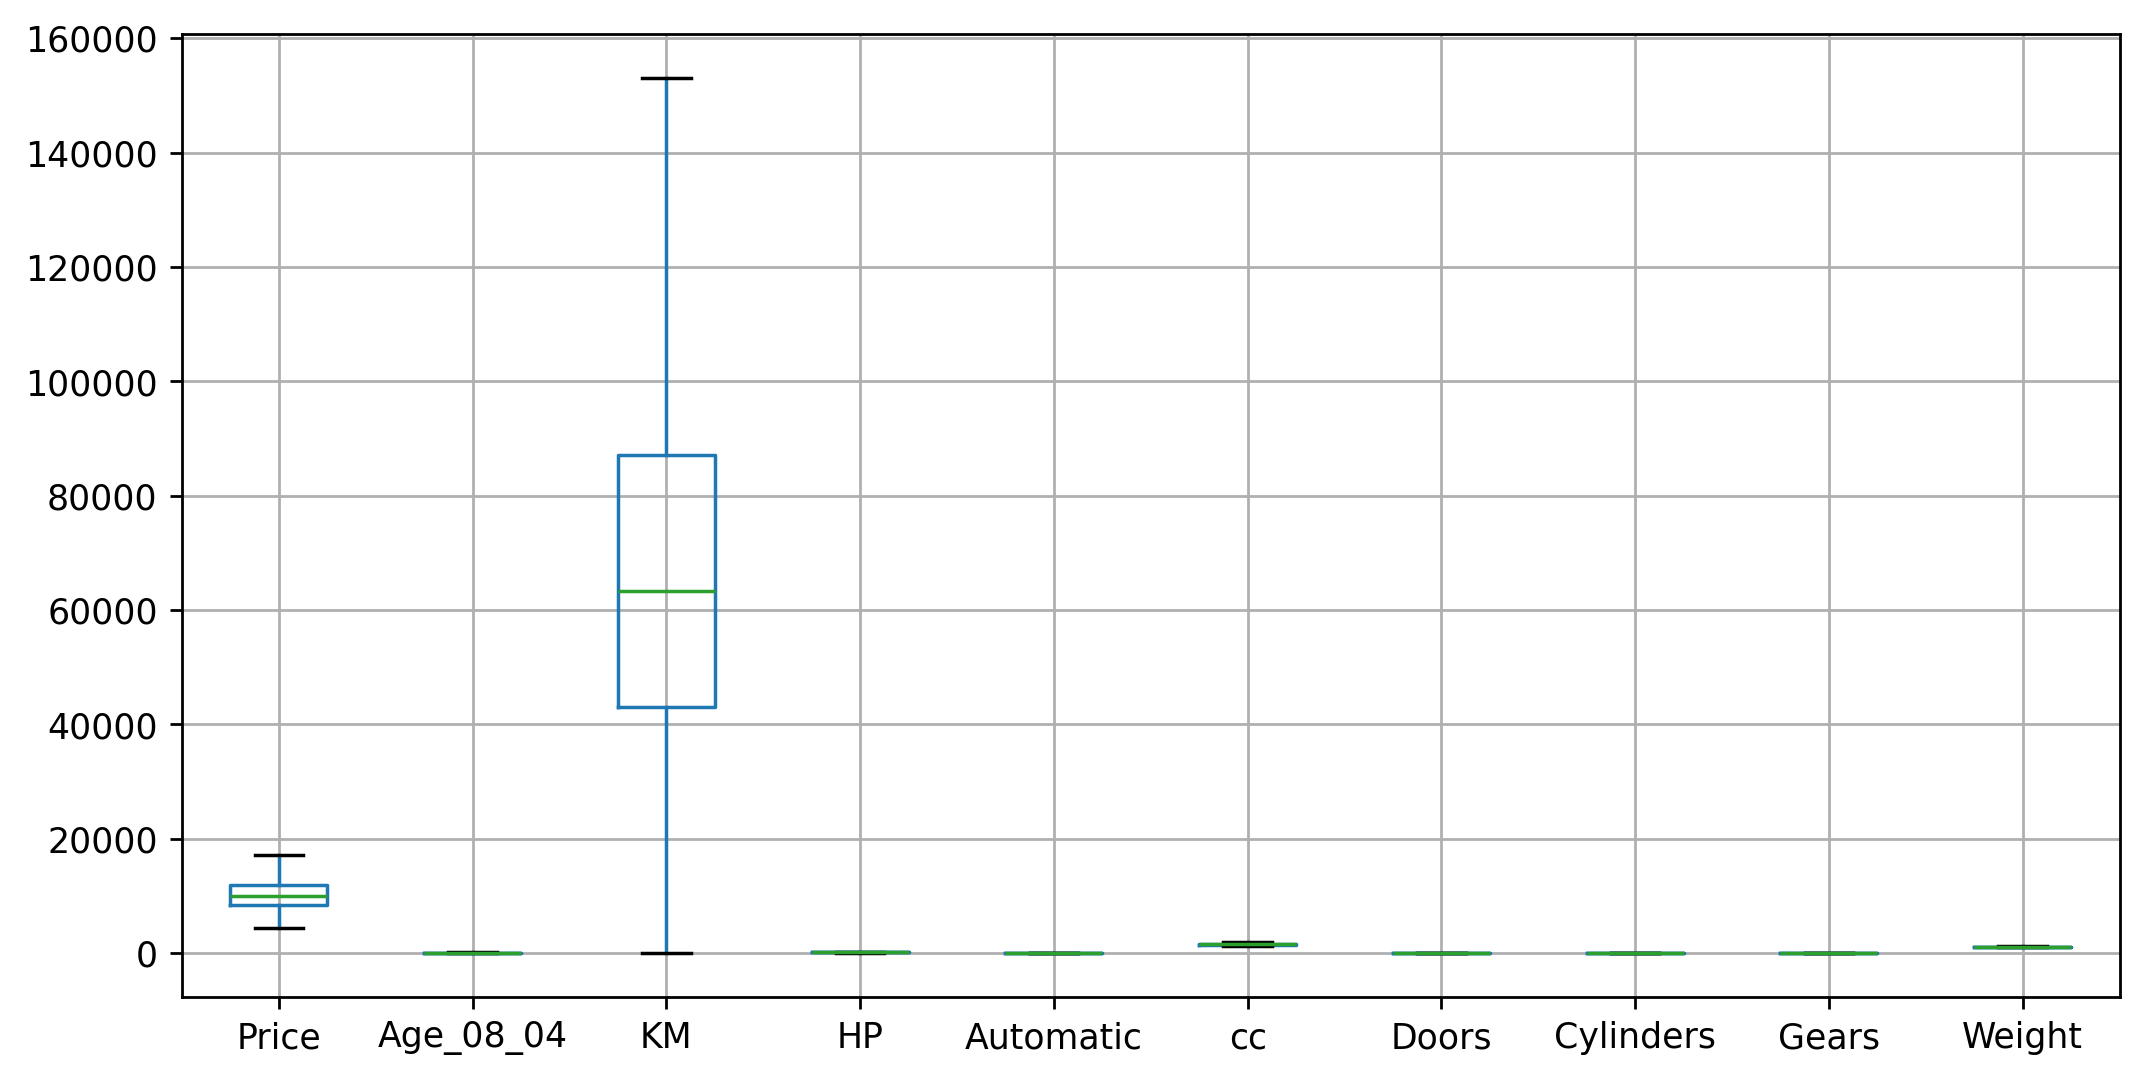

In [144]:
df.boxplot()

In [145]:
df=pd.get_dummies(data=df, columns= ['Fuel_Type']) 
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,0.0,1300.0,3.0,4.0,5.0,1025.0,0,0,1
1432,10845.0,72.0,19000.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1433,8500.0,71.0,17016.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1434,7250.0,70.0,16916.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1


In [147]:
df.isnull().sum()

Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [151]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [148]:
#data visualization
sns.pairplot(df)#pairplot used to give the combination of different graph.

In [188]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0


In [ ]:
##.Split the dataset into training and testing sets (e.g., 80% training, 20% testing). 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models

In [189]:
x = df.iloc[:,1:]
y = df['Price']
y

0       13500.0
1       13750.0
2       13950.0
3       14950.0
4       13750.0
         ...   
1431     7500.0
1432    10845.0
1433     8500.0
1434     7250.0
1435     6950.0
Name: Price, Length: 1436, dtype: float64

In [166]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
1,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
2,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
3,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
4,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69.0,20544.0,86.0,0.0,1300.0,3.0,4.0,5.0,1025.0,0,0,1
1432,72.0,19000.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1433,71.0,17016.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1434,70.0,16916.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1


In [167]:
from sklearn.model_selection import train_test_split

In [168]:
train_test_split(x,y,train_size=0.8)

[      Age_08_04        KM     HP  Automatic      cc  Doors  Cylinders  Gears  \
 344        33.0   28715.0  110.0        0.0  1600.0    5.0        4.0    5.0   
 1078       71.0  139145.0   73.0        0.0  1900.0    2.0        4.0    5.0   
 682        57.0  101791.0   72.0        0.0  1900.0    3.0        4.0    5.0   
 1152       80.0  100458.0  110.0        0.0  1600.0    5.0        4.0    5.0   
 160        16.0   11000.0  110.0        0.0  1600.0    4.0        4.0    5.0   
 ...         ...       ...    ...        ...     ...    ...        ...    ...   
 808        63.0   72522.0  110.0        0.0  1600.0    3.0        4.0    5.0   
 89         19.0   50005.0  110.0        0.0  1900.0    3.0        4.0    5.0   
 581        52.0   31579.0   97.0        0.0  1400.0    3.0        4.0    5.0   
 871        62.0   62377.0  110.0        0.0  1600.0    5.0        4.0    5.0   
 550        49.0   41710.0  110.0        0.0  1600.0    3.0        4.0    5.0   
 
       Weight  Fuel_Type_C

In [180]:
# split the data ( 80% training , 20% testing)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [181]:
# model 1 : Linear regression
from sklearn.linear_model import LinearRegression
lR = LinearRegression() 
lR.fit(xtrain,ytrain) 

LinearRegression()

In [182]:
y_pred1 = lR.predict(xtest)
y_pred1

array([11113.26658322,  8972.75597891,  9218.83721094,  8896.39531858,
        9903.40809606,  8054.49942974,  8614.74674756,  8328.25732068,
       13409.91924277, 12572.77795731,  9467.71674004,  9281.69937159,
       12402.23176066, 12687.92305259,  9693.50129821,  8679.25694735,
       12045.01408928, 14414.33194821,  7634.09004572,  9068.30112922,
       12167.29170695, 16805.40728489,  8029.26099159, 10451.21548665,
        7993.97856179, 15256.00840387, 10090.34448702,  7584.24123117,
       15287.35932055, 13742.70024119,  8247.30672324,  9399.25635594,
        8507.10144156,  9951.81325211, 10081.48753527,  8178.76445879,
        8694.30530937,  9834.84954399, 15908.7756028 ,  9498.55830041,
        9715.48689559,  9427.79593707,  7959.25310519,  6380.24166669,
        7414.49865092, 16351.72216648,  9372.69625423, 10448.823814  ,
        9069.56134934, 12863.08002449, 12467.21396562,  6994.59508465,
       14675.12451703, 15634.455778  ,  6817.86701359,  7866.2481911 ,
      

In [ ]:
#checking accuracy of the model 

In [183]:
from sklearn.metrics import mean_squared_error , r2_score

In [184]:
print("Model 1 - Linear Regression")
print("mean_squared_error:" ,mean_squared_error(ytest,y_pred1))
print('R-squared:' , r2_score(ytest , y_pred1))

mean_squared_error: 1179909.6024343518
R-squared: 0.8626684189497994


In [ ]:
#performing lasso regression on model 2 

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Model 2: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(xtrain, ytrain)
y_pred2 = lasso.predict(xtest)

print("Model 2 - Lasso Regression")
print("Mean Squared Error:", mean_squared_error(ytest, y_pred2))
print("R-squared:", r2_score(ytest, y_pred2))


In [ ]:
# Model 3: Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(xtrain, ytrain)
y_pred3 = ridge.predict(xtest)

print("Model 3 - Ridge Regression")
print("Mean Squared Error:", mean_squared_error(ytest, y_pred3))
print("R-squared:", r2_score(ytest, y_pred3))

In [ ]:
# interview quetions 
#1.What is Normalization & Standardization and how is it helpful?
#2.What techniques can be used to address multicollinearity in multiple linear regression?


In [ ]:
#1. :-  it   involves transforming the data to make it more suitable for modeling. These techniques can help to improve model performance, reduce the impact of outliers, and ensure that the data is on the same scale.

In [ ]:
#2.:-  regularization or feature selection can be applied to select a subset of independent variables that are not highly correlated with each other